In [9]:
import multiprocessing
import autograd.numpy as np 
from autograd import grad  
from scipy.integrate import odeint

In [10]:
def objective_reg(alpha, v, alpha_star):
    return v*(alpha_star**2-alpha**2)/np.sqrt(2*np.pi)-v**2/2.0

In [11]:
def objective_noreg(alpha, v, alpha_star):
    return v*(alpha_star**2-alpha**2)/np.sqrt(2*np.pi)

In [12]:
def reg(y,t,alpha_star):
    alpha,v   = y
    obj_alpha = lambda alpha : objective_reg(alpha, v, alpha_star)
    obj_v     = lambda v : objective_reg(alpha, v, alpha_star)

    dydt = [-grad(obj_alpha)(alpha),
             grad(obj_v)(v)]
    return dydt

def noreg(y,t,alpha_star):
    alpha,v   = y
    obj_alpha = lambda alpha : objective_noreg(alpha, v, alpha_star)
    obj_v     = lambda v : objective_noreg(alpha, v, alpha_star)

    dydt = [-grad(obj_alpha)(alpha),
             grad(obj_v)(v)]
    return dydt

def run_experiment(seed):
    np.random.seed(seed)
    initial_values = [(np.random.normal()),np.random.normal()]
    t = np.linspace(0, 200, 10001)
    reg_sol = odeint(reg, initial_values, t, args=(1,))
    return reg_sol

In [13]:
def hamiltonian(a,v,a_star):
    return (a_star**2 * np.log(a_star**2/a**2) - (a_star**2-a**2))/4+v**2/2


alphas = np.linspace(-3, 3, 150)
vs = np.linspace(-3, 3, 150)
meshF, meshG = np.meshgrid(alphas,vs)
values = hamiltonian(meshF, meshG, 1)

In [14]:
import pickle


def driver_func():
    PROCESSES = 6
    with multiprocessing.Pool(PROCESSES) as pool:
        results = [pool.apply_async(double, p) for i in range(1000)]

        total = 0
        with open('results.pkl', 'wb') as save_file:
            for r in results:
                total = total + 1
                print(f'We finished {total}!\t')
                data = r.get()
                pickle.dump(data, save_file)

In [15]:
if 1==0: 
    driver_func()

In [16]:
def loadall(filename):
    with open(filename, "rb") as f:
        while True:
            try:
                yield pickle.load(f)
            except EOFError:
                break
                
results = list(loadall('results.pkl'))

In [17]:
%matplotlib inline

import matplotlib.pyplot as plt

def draw_solution(solution_set):
    f = plt.figure(figsize=(8,8))
    plt.contour(meshF, meshG, values, 50, cmap ='jet')
    for reg_sol in solution_set:
        plt.plot(reg_sol[:, 0], (reg_sol[:, 1]),'-', color='green',linewidth=1.5)
        plt.plot(reg_sol[0, 0], (reg_sol[0, 1]), 'o',color='red')
    plt.plot([1],[0],'o',color="red")
    plt.plot([-1],[0],'o',color="red")
    plt.show()

In [21]:
import random
choices   = random.choices(range(1000), k = 20)
solutions = [results[i] for i in choices]

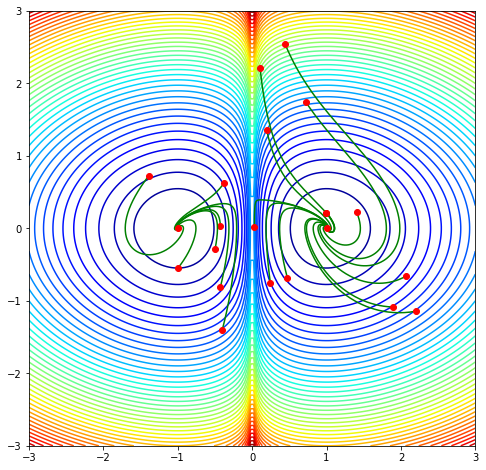

[312, 875, 631, 130, 637, 196, 12, 687, 39, 962, 767, 34, 881, 88, 492, 872, 569, 811, 930, 767]


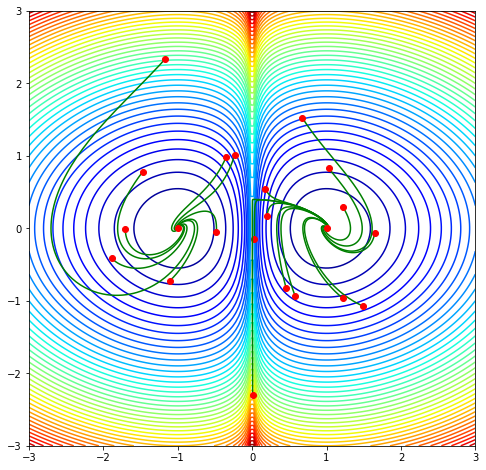

[626, 399, 989, 428, 32, 35, 817, 139, 719, 740, 315, 36, 794, 703, 586, 268, 847, 426, 605, 789]


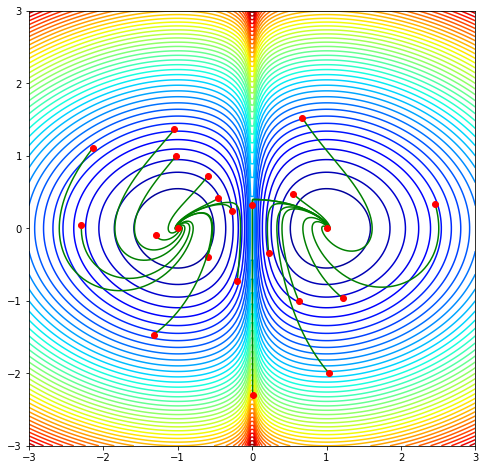

[675, 269, 605, 860, 63, 655, 220, 800, 916, 970, 946, 608, 36, 719, 19, 144, 207, 379, 531, 976]


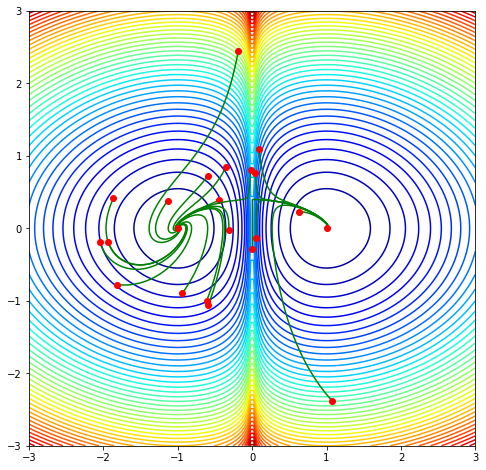

[799, 9, 8, 277, 841, 996, 111, 961, 235, 946, 933, 337, 109, 972, 849, 809, 398, 114, 290, 155]


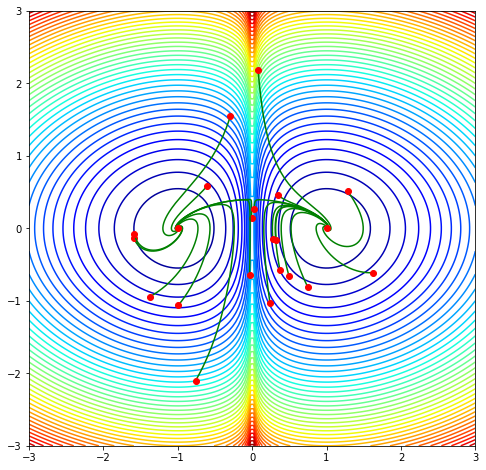

[826, 18, 934, 48, 580, 349, 690, 107, 284, 922, 356, 45, 681, 1, 389, 402, 704, 941, 159, 58]


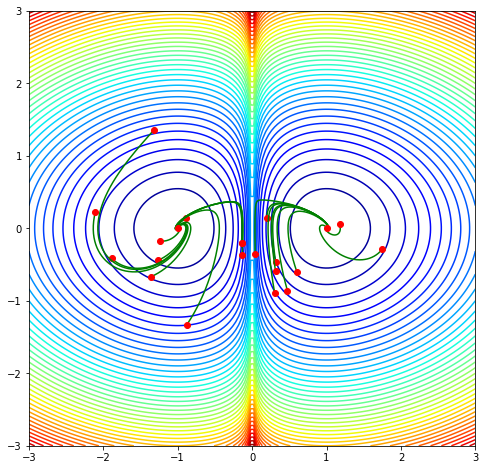

[442, 714, 180, 549, 368, 11, 430, 35, 57, 562, 969, 326, 775, 923, 593, 260, 701, 752, 380, 363]


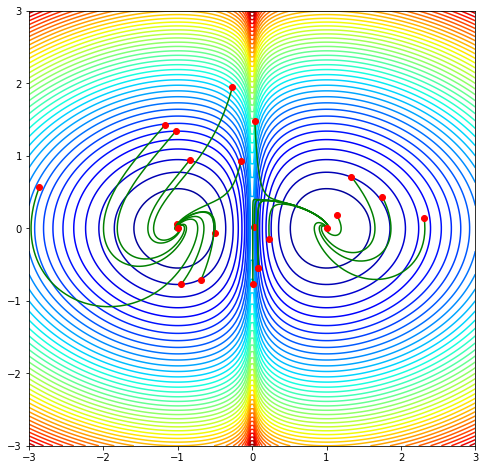

[154, 930, 10, 940, 181, 163, 858, 184, 528, 673, 660, 288, 820, 820, 212, 617, 113, 493, 804, 574]


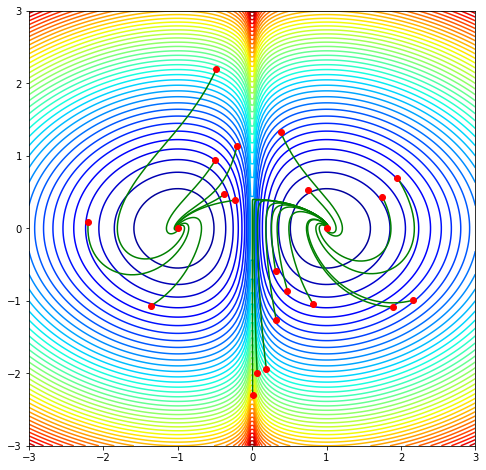

[605, 881, 795, 796, 882, 288, 780, 758, 403, 430, 363, 106, 157, 150, 234, 663, 434, 949, 711, 160]


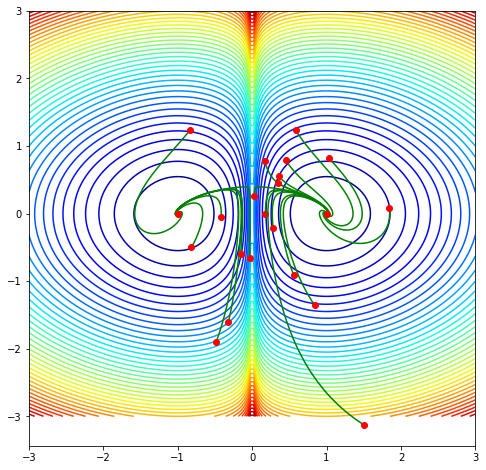

[319, 2, 45, 314, 774, 82, 33, 941, 710, 945, 604, 402, 420, 989, 409, 46, 814, 757, 552, 143]


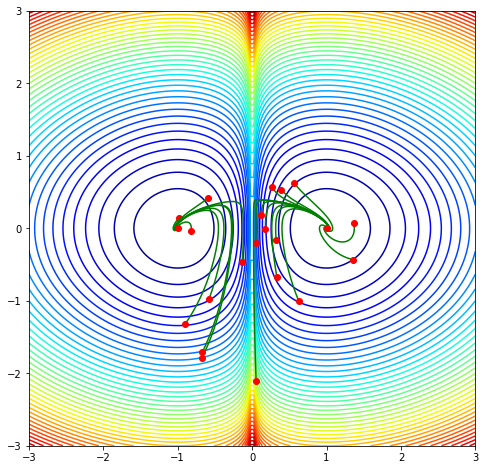

[624, 557, 974, 929, 776, 319, 361, 854, 388, 84, 736, 332, 655, 433, 635, 995, 389, 299, 645, 470]


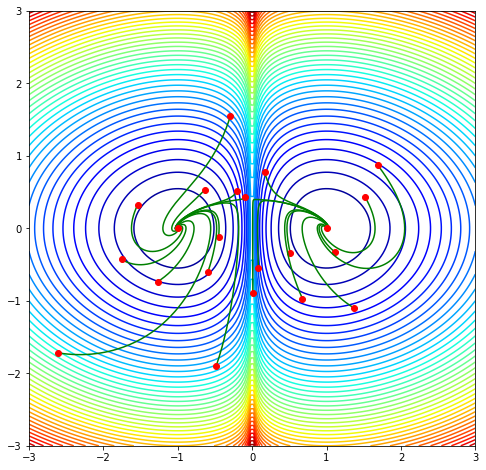

[263, 199, 272, 874, 897, 644, 97, 391, 765, 853, 502, 782, 86, 820, 420, 580, 487, 669, 314, 151]


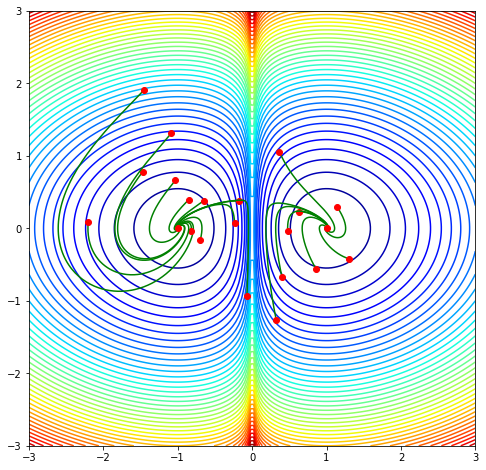

[403, 411, 200, 439, 155, 876, 315, 376, 476, 216, 294, 676, 433, 648, 886, 566, 830, 419, 878, 663]


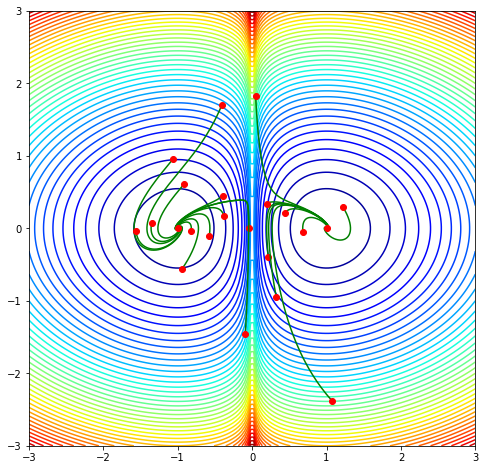

[592, 462, 936, 433, 783, 542, 865, 778, 540, 964, 346, 331, 22, 794, 500, 405, 438, 50, 841, 443]


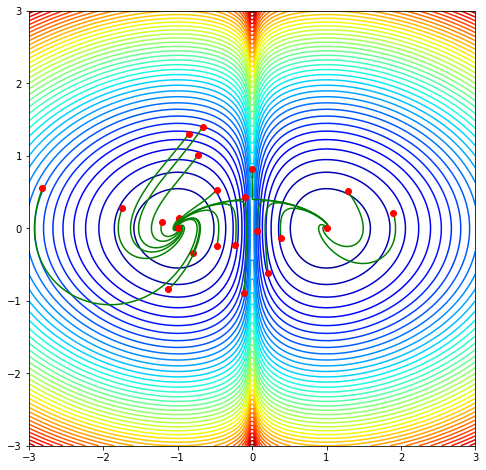

[843, 47, 343, 929, 461, 690, 629, 827, 80, 90, 821, 496, 560, 885, 126, 642, 782, 939, 966, 264]


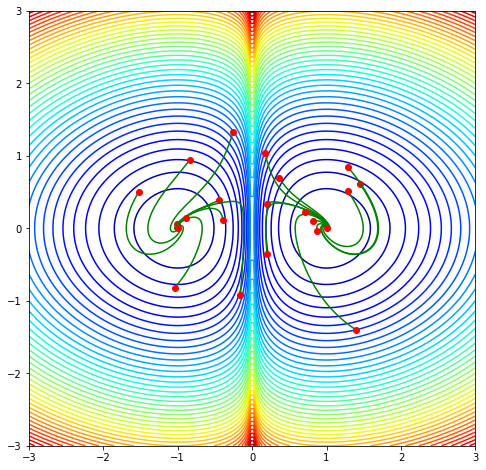

[778, 181, 690, 551, 147, 359, 699, 530, 246, 746, 617, 337, 49, 831, 366, 729, 717, 180, 576, 352]


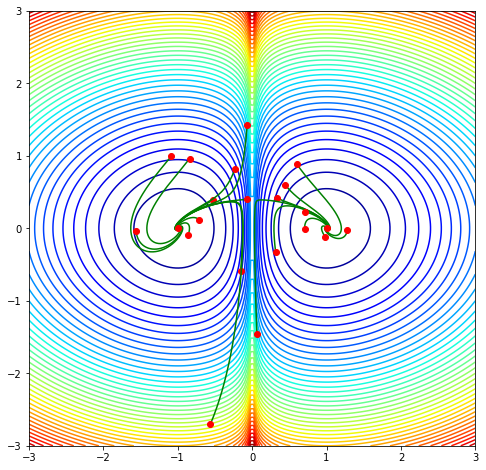

[408, 552, 303, 50, 206, 197, 75, 901, 245, 516, 360, 913, 123, 281, 261, 728, 501, 570, 576, 546]


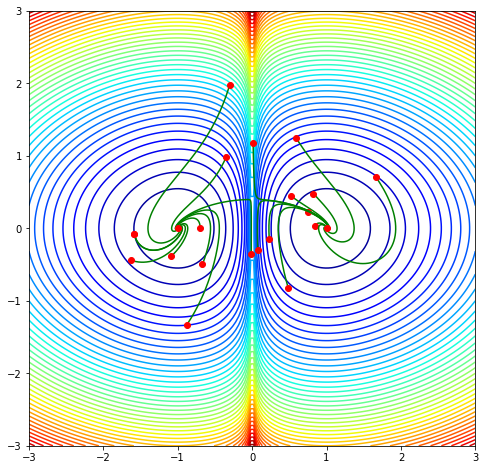

[356, 613, 212, 32, 450, 771, 456, 362, 705, 969, 356, 666, 407, 122, 754, 125, 353, 273, 928, 805]


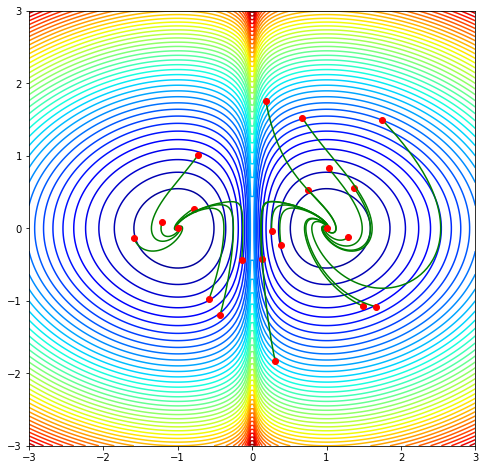

[780, 810, 573, 251, 522, 264, 906, 297, 713, 399, 989, 214, 36, 349, 71, 289, 225, 654, 966, 624]


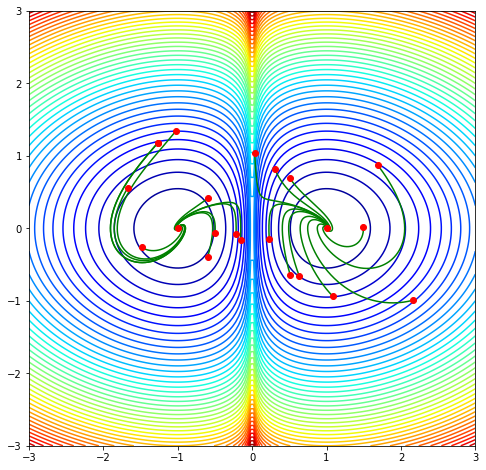

[135, 410, 686, 806, 902, 106, 212, 269, 660, 243, 135, 940, 59, 317, 177, 755, 136, 669, 776, 300]


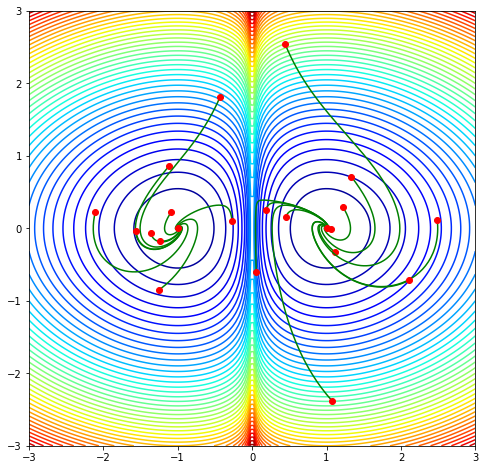

[714, 841, 812, 691, 10, 688, 947, 395, 41, 725, 199, 896, 131, 794, 506, 148, 919, 50, 562, 811]


In [23]:
#[217, 798, 447, 173, 248, 926, 871, 652, 708, 952]
for i in range (20):
    choices   = random.choices(range(1000), k = 20)
    solutions = [results[i] for i in choices]
    draw_solution(solutions)
    print(choices)